<a href="https://colab.research.google.com/github/hemonJuice/COMAP2022C_Markov-LSTM/blob/main/2228513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
  
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving BCHAIN-MKPRU.csv to BCHAIN-MKPRU.csv


Saving LBMA-GOLD.csv to LBMA-GOLD.csv


In [ ]:

bit_df = pd.read_csv(io.BytesIO(uploaded1['BCHAIN-MKPRU.csv']))
gold_df = pd.read_csv(io.BytesIO(uploaded2['LBMA-GOLD.csv']))

gold_df = gold_df.rename(columns={'USD (PM)': 'Value'})



gold_df['Date'] = pd.to_datetime(gold_df['Date'])
min_date1 = gold_df['Date'].min()
max_date1 = gold_df['Date'].max()
r1 = pd.date_range(start=min_date1, end=max_date1)
gold_temp = gold_df.set_index('Date').reindex(r1).fillna(0.0).rename_axis('Date').reset_index()
#gold_df['Value1'] = gold_df['Value'].fillna(method='ffill')

g_weekdays = gold_temp['Value'].tolist()
g_weekdays

[1324.6,
 1323.65,
 1321.75,
 1310.8,
 1308.35,
 0.0,
 0.0,
 1314.85,
 1313.8,
 1326.1,
 1339.1,
 1338.65,
 0.0,
 0.0,
 1340.5,
 1327.0,
 1322.5,
 1318.1,
 1322.5,
 0.0,
 0.0,
 1313.3,
 1283.3,
 1269.4,
 1254.5,
 1258.75,
 0.0,
 0.0,
 1259.5,
 1253.45,
 1256.5,
 1261.05,
 1251.75,
 0.0,
 0.0,
 1254.8,
 1258.2,
 1269.05,
 1271.65,
 1266.05,
 0.0,
 0.0,
 1265.55,
 1269.4,
 1270.5,
 1266.25,
 1273.0,
 0.0,
 0.0,
 1272.0,
 1288.45,
 1303.75,
 1301.0,
 1302.8,
 0.0,
 0.0,
 1283.05,
 1282.35,
 1281.4,
 1267.5,
 1236.45,
 0.0,
 0.0,
 1213.6,
 1226.95,
 1229.2,
 1226.75,
 1211.0,
 0.0,
 0.0,
 1214.25,
 1212.25,
 1185.35,
 1186.1,
 1187.7,
 0.0,
 0.0,
 1187.0,
 1186.55,
 1178.1,
 1161.85,
 1173.5,
 0.0,
 0.0,
 1162.2,
 1172.5,
 1177.65,
 1171.05,
 1163.6,
 0.0,
 0.0,
 1156.1,
 1158.55,
 1162.25,
 1126.95,
 1131.6,
 0.0,
 0.0,
 1136.25,
 1125.7,
 1133.65,
 1131.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1134.6,
 1145.9,
 0.0,
 0.0,
 0.0,
 0.0,
 1151.0,
 1164.25,
 1176.7,
 1175.85,
 0.0,
 0.0,
 1178.5,
 

In [ ]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
# print(dataset)
min_date = gold_df['Date'].min()
max_date = gold_df['Date'].max()

r = pd.date_range(start=min_date, end=max_date)
gold_df = gold_df.set_index('Date').reindex(r).fillna(method='ffill').rename_axis('Date').reset_index()
#gold_df['Value1'] = gold_df['Value'].fillna(method='ffill')

print(gold_df.head(20))


#bit_df['Date'] = pd.to_datetime(bit_df['Date'],format="%y-%m-%d")
bit_df = bit_df.reindex(bit_df.index.drop(0)).reset_index(drop=True)


         Date    Value
0  2016-09-12  1324.60
1  2016-09-13  1323.65
2  2016-09-14  1321.75
3  2016-09-15  1310.80
4  2016-09-16  1308.35
5  2016-09-17  1308.35
6  2016-09-18  1308.35
7  2016-09-19  1314.85
8  2016-09-20  1313.80
9  2016-09-21  1326.10
10 2016-09-22  1339.10
11 2016-09-23  1338.65
12 2016-09-24  1338.65
13 2016-09-25  1338.65
14 2016-09-26  1340.50
15 2016-09-27  1327.00
16 2016-09-28  1322.50
17 2016-09-29  1318.10
18 2016-09-30  1322.50
19 2016-10-01  1322.50


In [ ]:
bit_df['Value'] = pd.to_numeric(bit_df['Value'])
gold_df['Value'] = pd.to_numeric(gold_df['Value'])

bit_df['gain'] = bit_df['Value'].pct_change()
gold_df['gain'] = gold_df['Value'].pct_change()


bit_df['LMH'] = pd.qcut(bit_df['gain'], 3, labels=["L", "M", "H"])
gold_df['LMH'] = pd.qcut(gold_df['gain'], 3, labels=["L", "M", "H"])

# gold_df = pd.DataFrame(gold_df, columns=['Date', 'Value1','gain','LMH'])
# gold_df = gold_df.rename(columns={'Value1': 'Value'})
bit_df['LMH'] = bit_df.LMH.astype(str)





gold_df['DayOfWeek'] = gold_df['Date'].dt.weekday



gold_df['LMH'] = gold_df.LMH.astype(str)

gold_df.loc[gold_df['DayOfWeek']==5, 'LMH'] = 'N'

print(gold_df.head(10))



        Date    Value      gain  LMH  DayOfWeek
0 2016-09-12  1324.60       NaN  nan          0
1 2016-09-13  1323.65 -0.000717    L          1
2 2016-09-14  1321.75 -0.001435    L          2
3 2016-09-15  1310.80 -0.008284    L          3
4 2016-09-16  1308.35 -0.001869    L          4
5 2016-09-17  1308.35  0.000000    N          5
6 2016-09-18  1308.35  0.000000    L          6
7 2016-09-19  1314.85  0.004968    H          0
8 2016-09-20  1313.80 -0.000799    L          1
9 2016-09-21  1326.10  0.009362    H          2


In [ ]:
gold_df.head(100)

,Date,Value,gain,LMH,DayOfWeek
0,2016-09-12,1324.60,NaN,nan,0
1,2016-09-13,1323.65,-0.000717,L,1
2,2016-09-14,1321.75,-0.001435,L,2
3,2016-09-15,1310.80,-0.008284,L,3
4,2016-09-16,1308.35,-0.001869,L,4
...,...,...,...,...,...
95,2016-12-16,1131.60,0.004126,H,4
96,2016-12-17,1131.60,0.000000,N,5
97,2016-12-18,1131.60,0.000000,L,6
98,2016-12-19,1136.25,0.004109,H,0


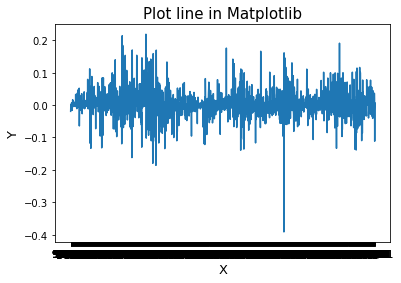

In [ ]:
plt.plot(bit_df['Date'], bit_df['gain'])


plt.title("Plot line in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.show()

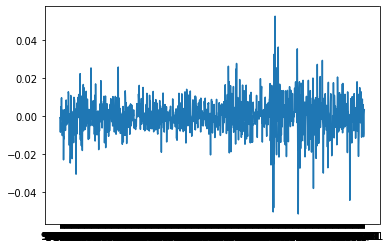

In [ ]:
plt.plot(gold_df['Date'], gold_df['gain'])

plt.show()



In [ ]:
from tkinter import _flatten
def construct_q(df,sample_size):
  s1 = df.head(sample_size)['LMH'].tolist()

  trans = np.zeros((3,3), dtype = int)

  for i in range(len(s1)-1):
    if s1[i] == "L":
      if s1[i+1] == "L":
        trans[0][0] += 1
      elif s1[i+1] == "M":
        trans[0][1] += 1
      elif s1[i+1] == "H":
        trans[0][2] += 1
    elif s1[i] == "M":
      if s1[i+1] == "L":
        trans[1][0] += 1
      elif s1[i+1] == "M":
        trans[1][1] += 1
      elif s1[i+1] == "H":
        trans[1][2] += 1
    elif s1[i] == "H":
      if s1[i+1] == "L":
        trans[2][0] += 1
      elif s1[i+1] == "M":
        trans[2][1] += 1
      elif s1[i+1] == "H":
        trans[2][2] += 1

  trans = trans.tolist()
  trans = list(_flatten(trans))
  return trans

construct_q(bit_df,100)

[1, 7, 3, 8, 51, 12, 2, 13, 1]

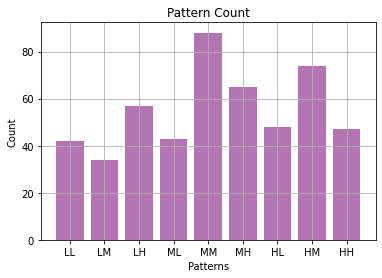

In [ ]:
ll = construct_q(bit_df,500)


plt.title('Pattern Count')
plt.xlabel('Patterns')
plt.ylabel('Count')
plt.grid(True)

bars = ('LL', 'LM', 'LH', 'ML', 'MM','MH', 'HL', 'HM', 'HH')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, ll, color = (0.5,0.1,0.5,0.6))
plt.xticks(x_pos, bars)
#plt.savefig("pattern.png")
#files.download("pattern.png") 

plt.show()


In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)

axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
construct_p(bit_df,100)

array([[0.09090909, 0.63636364, 0.27272727],
       [0.11267606, 0.71830986, 0.16901408],
       [0.125     , 0.8125    , 0.0625    ]])

In [ ]:
construct_p(bit_df,1000)

array([[0.34020619, 0.31958763, 0.34020619],
       [0.26566416, 0.44862155, 0.28571429],
       [0.27922078, 0.40909091, 0.31168831]])

In [ ]:
construct_p(bit_df,1500)

array([[0.33471933, 0.30977131, 0.35550936],
       [0.29724771, 0.41284404, 0.28990826],
       [0.33474576, 0.36016949, 0.30508475]])

In [ ]:




def construct_p(df,sample_size):
  s1 = df.head(sample_size)['LMH'].tolist()

  trans = np.zeros((3,3), dtype = int)

  for i in range(len(s1)-1):
    if s1[i] == "L":
      if s1[i+1] == "L":
        trans[0][0] += 1
      elif s1[i+1] == "M":
        trans[0][1] += 1
      elif s1[i+1] == "H":
        trans[0][2] += 1
    elif s1[i] == "M":
      if s1[i+1] == "L":
        trans[1][0] += 1
      elif s1[i+1] == "M":
        trans[1][1] += 1
      elif s1[i+1] == "H":
        trans[1][2] += 1
    elif s1[i] == "H":
      if s1[i+1] == "L":
        trans[2][0] += 1
      elif s1[i+1] == "M":
        trans[2][1] += 1
      elif s1[i+1] == "H":
        trans[2][2] += 1


  t1 = sum(trans[0])
  t2 = sum(trans[1])
  t3 = sum(trans[2])


  if t1 == 0:
    trans_prob1 = np.array([0,0,0])
  else:
    trans_prob1 = trans[0]/t1
  
  if t2 == 0:
    trans_prob2 = np.array([0,0,0])
  else:
    trans_prob2 = trans[1]/t2

  if t1 == 0:
    trans_prob3 = np.array([0,0,0])
  else:
    trans_prob3 = trans[2]/t3

  # trans_prob2 = trans[1]/t2
  # trans_prob3 = trans[2]/t3

  trans_prob = np.array([trans_prob1,trans_prob2,trans_prob3])

  return trans_prob




def init_dist_gen(status):
  if status == "L":
    s = np.array([1,0,0])
  elif status == "M":
    s = np.array([0,1,0])
  elif status == "H":
    s = np.array([0,0,1])
  
  return s


In [ ]:
asset = [1000,0,0]
start = 5






bit_fullLMH = bit_df['LMH'].tolist()
gold_fullLMH = gold_df['LMH'].tolist()

bit_value_list = bit_df['Value'].tolist()
gold_value_list = gold_df['Value'].tolist()

init_train_bit = bit_df.head(start)
#init_train_gold = gold_df.head(start)
last_status_b1 = bit_df['LMH'].iloc[-1]
last_date_b1 = bit_df['Date'].iloc[-1]


init_state_b1 = init_dist_gen(last_status_b1)

p_b1 = construct_p(bit_df,start)
p_g1 = construct_p(gold_df,start)


result_init_b1 = np.dot(init_state_b1,np.linalg.matrix_power(p_b1, 50))
maxprob_b1 = max(init_state_b1)

print(result_init_b1)

[0. 1. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [ ]:

import pdb


asset = [1000,0,0]
start = 10






bit_fullLMH = bit_df['LMH'].tolist()
gold_fullLMH = gold_df['LMH'].tolist()

bit_value_list = bit_df['Value'].tolist()
gold_value_list = gold_df['Value'].tolist()

bit_date = bit_df['Date'].tolist()
gold_date = gold_df['Date'].tolist()

init_train_bit = bit_df.head(start)
#init_train_gold = gold_df.head(start)
last_status_b1 = bit_df['LMH'].iloc[-1]
last_date_b1 = bit_df['Date'].iloc[-1]


init_state_b1 = init_dist_gen(last_status_b1)

p_b1 = construct_p(bit_df,start)
p_g1 = construct_p(gold_df,start)


result_init_b1 = np.dot(init_state_b1,np.linalg.matrix_power(p_b1, 50))
maxprob_b1 = max(result_init_b1)



buy_bit = False
buy_gold = False

buy_bit_price = 0
buy_gold_price = 0


trans_gold_date = []
trans_bit_date = []

trans_gold_price = []
trans_bit_price = []

prob_req = 0


m = []

t = 0

for i in range(start+1,len(bit_fullLMH)-1):
    current_cash = asset[0]

    if g_weekdays[i] != 0: ##工作日，gold bit都能交易
      if (bit_fullLMH[i] == 'L' and gold_fullLMH[i] == 'L'):  ##如果现在 gold bit 都是L，买进
        p_b = construct_p(bit_df,i)
        p_g = construct_p(gold_df,i)
        re_b = np.dot(init_dist_gen(bit_fullLMH[i]),np.linalg.matrix_power(p_b, 50))
        maxprob_b = max(re_b)
        max_index_b = re_b.tolist().index(maxprob_b)

        re_g = np.dot(init_dist_gen(gold_fullLMH[i]),np.linalg.matrix_power(p_g, 50)) 
        maxprob_g = max(re_g)
        max_index_g = re_g.tolist().index(maxprob_g)

        

        if (max_index_b == 2 and max_index_g == 2):  ##预测出来gold bit都会变 H
          if (maxprob_b >= maxprob_g and maxprob_b >= prob_req):          ##选择几率大的 
            if(buy_bit == False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])      


              buy_bit_price = bit_value_list[i]

              print(asset)

          elif maxprob_g > maxprob_b and maxprob_g >= prob_req:
            if(buy_gold == False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])
            
              buy_gold_price = gold_value_list[i]
              print(asset)

        elif (max_index_b == 2 and max_index_g != 2): ##预测 bit 变 H，买bit
          if (maxprob_b >= prob_req):
            if(buy_bit==False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])

              buy_bit_price = bit_value_list[i]
              print(asset)

        elif (max_index_g == 2 and max_index_b != 2): ##预测 gold 变 H， 买gold
          if(maxprob_g >= prob_req):
            if(buy_gold==False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])
            
              buy_gold_price = gold_value_list[i]
              print(asset)

      elif (bit_fullLMH[i] == 'L' and gold_fullLMH[i] != 'L'): ##如果现在 bit 是L，买进
        p_bb = construct_p(bit_df,i)
        
        re_bb = np.dot(init_dist_gen(bit_fullLMH[i]),np.linalg.matrix_power(p_bb, 50))
        maxprob_bb = max(re_bb)
        max_index_bb = re_bb.tolist().index(maxprob_bb)
        if max_index_bb == 2:                ##预测 bit 变 H， 买bit
          if (maxprob_b >= prob_req):
            if(buy_bit == False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])

              buy_bit_price = bit_value_list[i]

              print(asset)

      elif (bit_fullLMH[i] != 'L' and gold_fullLMH[i] == 'L'):  ##如果现在 gold 是L，买进
        p_gg = construct_p(gold_df,i)

        re_gg = np.dot(init_dist_gen(gold_fullLMH[i]),np.linalg.matrix_power(p_gg, 50))
        maxprob_gg = max(re_gg)
        

        max_index_gg = re_gg.tolist().index(maxprob_gg)

        if max_index_gg == 1: 
          if (maxprob_g >= prob_req):                   ##预测 gold 变 H， 买gold      
            if(buy_gold==False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])

              buy_gold_price = gold_value_list[i]

              print(asset)




      elif (bit_fullLMH[i] == 'H' and gold_fullLMH[i] == 'H'):  ##如果都是 H
        if (buy_bit == True and buy_gold == False and buy_bit_price < bit_value_list[i]): ##sell bit

          buy_bit = False
          asset[0] += (asset[2]*bit_value_list[i])*0.98
          asset[2] -= asset[2]

          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i]) 

          print(asset)

        elif (buy_bit == False and buy_gold == True and buy_gold_price < gold_value_list[i]):  #sell gold

          buy_gold = False
          asset[0] += (asset[1]*gold_value_list[i])*0.99
          asset[1] -= asset[1]

          trans_gold_date.append(gold_date[i])
          trans_gold_price.append(gold_value_list[i])

          print(asset)

        elif (buy_bit == True and buy_gold == True ):  #sell gold bit

          if buy_gold_price < gold_value_list[i]:
            buy_gold = False
            asset[0] += (asset[1]*gold_value_list[i])*0.99
            asset[1] -= asset[1]

            trans_gold_date.append(gold_date[i])
            trans_gold_price.append(gold_value_list[i])

          if buy_bit_price < bit_value_list[i]:
            buy_bit = False
            asset[0] += asset[2]*bit_value_list[i]*0.98
            asset[2] -= asset[2]

            trans_bit_date.append(bit_date[i])
            trans_bit_price.append(bit_value_list[i])

            print(asset)

          

      elif (bit_fullLMH[i] == 'H' and gold_fullLMH[i] != 'H' and buy_bit_price < bit_value_list[i]):
        if buy_bit == True:
          buy_bit = False
          asset[0] += asset[2]*bit_value_list[i]*0.98
          asset[2] -= asset[2]

          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i])

          print(asset)

      elif (bit_fullLMH[i] != 'H' and gold_fullLMH[i] == 'H' and buy_gold_price < gold_value_list[i]):
        if buy_gold == True:
          buy_gold = False
          asset[0] += asset[1]*gold_value_list[i]*0.99
          asset[1] -= asset[1] 
        
          trans_gold_date.append(gold_date[i])
          trans_gold_price.append(gold_value_list[i])

          print(asset)
      

    else: ##周六周日
      if bit_fullLMH[i] == 'L':
        if buy_bit == False:
          buy_bit = True
          asset[0] -= current_cash
          asset[2] += current_cash*(1/bit_value_list[i])


          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i])


          print(asset)
        

      elif bit_fullLMH[i] == 'H' and (buy_bit_price - bit_value_list[i]) > 100 and buy_bit == True:
        buy_bit = False
        asset[0] += asset[2]*bit_value_list[i]*0.98
        asset[2] -= asset[2]

        trans_bit_date.append(bit_date[i])
        trans_bit_price.append(bit_value_list[i])

        print(asset)

    t+=1 
    m.append(current_cash)  
    #pdb.set_trace()
  ##else:
  ##  continue







print(trans_gold_date)
print(trans_gold_price)


print(trans_bit_date)
print(trans_bit_price)












[0, 0, 1.4210399170112689]
[1028.4909977121256, 0, 0.0]
[0.0, 0, 1.412839988065451]
[1069.4935921417682, 0, 0.0]
[0.0, 0, 1.3992563318746722]
[1130.2154400685351, 0, 0.0]
[0.0, 0, 1.267611893169138]
[1196.7681067284586, 0, 0.0]
[0.0, 0, 1.256911313058298]
[1387.9126432795365, 0, 0.0]
[0.0, 0, 1.547576066009764]
[1259.5566843646868, 0, 0.0]
[0.0, 0, 1.0946901002133271]
[1277.4342840452205, 0, 0.0]
[0.0, 0, 1.0051151260614704]
[1226.7061942723892, 0, 0.0]
[0.0, 0, 1.2882424947748918]
[1324.445713689745, 0, 0.0]
[0.0, 0, 1.4273120964832962]
[1450.840858244271, 0, 0.0]
[0.0, 0, 1.2283292191792783]
[1476.5557575481682, 0, 0.0]
[0.0, 0, 1.261625275597396]
[1505.8399552727335, 0, 0.0]
[0.0, 0, 0.9914995590273143]
[1594.1397733568494, 0, 0.0]
[0.0, 0, 0.8996680220671166]
[1593.6137813141663, 0, 0.0]
[0.0, 0, 0.7933005024363146]
[1625.352994061016, 0, 0.0]
[0.0, 0, 0.741161525017007]
[2094.261153235526, 0, 0.0]
[0.0, 0, 0.8088558449644502]
[1891.132142743556, 0, 0.0]
[0.0, 0, 0.9184731345436367

In [ ]:
####################update

asset = [1000,0,0]
start = 10






bit_fullLMH = bit_df['LMH'].tolist()
gold_fullLMH = gold_df['LMH'].tolist()

bit_value_list = bit_df['Value'].tolist()
gold_value_list = gold_df['Value'].tolist()

bit_date = bit_df['Date'].tolist()
gold_date = gold_df['Date'].tolist()

init_train_bit = bit_df.head(start)
#init_train_gold = gold_df.head(start)
last_status_b1 = bit_df['LMH'].iloc[-1]
last_date_b1 = bit_df['Date'].iloc[-1]


init_state_b1 = init_dist_gen(last_status_b1)

p_b1 = construct_p(bit_df,start)
p_g1 = construct_p(gold_df,start)


result_init_b1 = np.dot(init_state_b1,np.linalg.matrix_power(p_b1, 50))
maxprob_b1 = max(result_init_b1)


bbb = 0.98
ggg = 0.95


buy_bit = False
buy_gold = False

buy_bit_price = 0
buy_gold_price = 0


trans_gold_date = []
trans_bit_date = []

trans_gold_price = []
trans_bit_price = []

prob_req = 0.3


m = []

t = 0

for i in range(start+1,len(bit_fullLMH)-1):
    current_cash = asset[0]

    if g_weekdays[i] != 0: ##工作日，gold bit都能交易
      if (bit_fullLMH[i] == 'L' and gold_fullLMH[i] == 'L'):  ##如果现在 gold bit 都是L，买进
        p_b = construct_p(bit_df,i)
        p_g = construct_p(gold_df,i)
        re_b = np.dot(init_dist_gen(bit_fullLMH[i]),np.linalg.matrix_power(p_b, 50))
        maxprob_b = max(re_b)
        max_index_b = re_b.tolist().index(maxprob_b)

        re_g = np.dot(init_dist_gen(gold_fullLMH[i]),np.linalg.matrix_power(p_g, 50)) 
        maxprob_g = max(re_g)
        max_index_g = re_g.tolist().index(maxprob_g)

        ############################
        if (max_index_b == 1 and max_index_g != 1 and max_index_g != 2):
          if (maxprob_b >= prob_req):
            if(buy_bit==False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])

              buy_bit_price = bit_value_list[i]
              print(asset)
        if (max_index_g == 1 and max_index_b != 1 and max_index_b != 2):
          if (maxprob_g >= prob_req):
            if(buy_gold==False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])

              buy_gold_price = gold_value_list[i]
              print(asset)
          
        ##############################
        if (max_index_b == 2 and max_index_g == 2):  ##预测出来gold bit都会变 H
          if (maxprob_b >= maxprob_g and maxprob_b >= prob_req):          ##选择几率大的 
            if(buy_bit == False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])      


              buy_bit_price = bit_value_list[i]

              print(asset)

          elif maxprob_g > maxprob_b and maxprob_g >= prob_req:
            if(buy_gold == False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])
            
              buy_gold_price = gold_value_list[i]
              print(asset)

        elif (max_index_b == 2 and max_index_g != 2): ##预测 bit 变 H，买bit
          if (maxprob_b >= prob_req):
            if(buy_bit==False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])

              buy_bit_price = bit_value_list[i]
              print(asset)

        elif (max_index_g == 2 and max_index_b != 2): ##预测 gold 变 H， 买gold
          if(maxprob_g >= prob_req):
            if(buy_gold==False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])
            
              buy_gold_price = gold_value_list[i]
              print(asset)

      elif (bit_fullLMH[i] == 'L' and gold_fullLMH[i] != 'L'): ##如果现在 bit 是L，买进
        p_bb = construct_p(bit_df,i)
        
        re_bb = np.dot(init_dist_gen(bit_fullLMH[i]),np.linalg.matrix_power(p_bb, 50))
        maxprob_bb = max(re_bb)
        max_index_bb = re_bb.tolist().index(maxprob_bb)
        if max_index_bb == 2:                ##预测 bit 变 H， 买bit
          if (maxprob_b >= prob_req):
            if(buy_bit == False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])

              buy_bit_price = bit_value_list[i]

              print(asset)

        ############################################
        if max_index_bb == 1:
          if (maxprob_b >= prob_req):
            if(buy_bit==False):
              buy_bit = True
              asset[0] -= current_cash
              asset[2] += (current_cash*0.98)*(1/bit_value_list[i])

              trans_bit_date.append(bit_date[i])
              trans_bit_price.append(bit_value_list[i])

              buy_bit_price = bit_value_list[i]
              print(asset)
        #############################################
        

      elif (bit_fullLMH[i] != 'L' and gold_fullLMH[i] == 'L'):  ##如果现在 gold 是L，买进
        p_gg = construct_p(gold_df,i)

        re_gg = np.dot(init_dist_gen(gold_fullLMH[i]),np.linalg.matrix_power(p_gg, 50))
        maxprob_gg = max(re_gg)
        

        max_index_gg = re_gg.tolist().index(maxprob_gg)

        if max_index_gg == 2: 
          if (maxprob_g >= prob_req):                   ##预测 gold 变 H， 买gold      
            if(buy_gold==False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])

              buy_gold_price = gold_value_list[i]

              print(asset)

        #############################################################
        if max_index_gg == 1: 
          if (maxprob_g >= prob_req):                   ##预测 gold 变 H， 买gold      
            if(buy_gold==False):
              buy_gold = True
              asset[0] -= current_cash
              asset[1] += (current_cash*0.99)*(1/gold_value_list[i])

              trans_gold_date.append(gold_date[i])
              trans_gold_price.append(gold_value_list[i])

              buy_gold_price = gold_value_list[i]

              print(asset)
        ##############################################################

      ######################################################################

      elif (bit_fullLMH[i] == 'M' and gold_fullLMH[i] == 'M'):
        if (buy_bit == True and buy_gold == False and buy_bit_price < bit_value_list[i] and (asset[2]*bit_value_list[i]*bbb - asset[2]*buy_bit_price) > 0): ##sell bit

          buy_bit = False
          asset[0] += (asset[2]*bit_value_list[i])*0.98
          asset[2] -= asset[2]

          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i]) 

          print(asset)

        elif (buy_bit == False and buy_gold == True and buy_gold_price < gold_value_list[i] and (asset[1]*gold_value_list[i]*ggg - asset[1]*buy_gold_price) > 0):  #sell gold

          buy_gold = False
          asset[0] += (asset[1]*gold_value_list[i])*0.99
          asset[1] -= asset[1]

          trans_gold_date.append(gold_date[i])
          trans_gold_price.append(gold_value_list[i])

          print(asset)

        elif (buy_bit == True and buy_gold == True ):  #sell gold bit

          if buy_gold_price < gold_value_list[i] and (asset[1]*gold_value_list[i]*ggg - asset[2]*buy_gold_price) > 0:
            buy_gold = False
            asset[0] += (asset[1]*gold_value_list[i])*0.99
            asset[1] -= asset[1]

            trans_gold_date.append(gold_date[i])
            trans_gold_price.append(gold_value_list[i])

          if buy_bit_price < bit_value_list[i] and (asset[2]*bit_value_list[i]*bbb - asset[2]*buy_bit_price) > 0:
            buy_bit = False
            asset[0] += asset[2]*bit_value_list[i]*0.98
            asset[2] -= asset[2]

            trans_bit_date.append(bit_date[i])
            trans_bit_price.append(bit_value_list[i])

            print(asset)


      elif (bit_fullLMH[i] == 'M' and gold_fullLMH[i] != 'M' and gold_fullLMH[i] != 'H' and buy_bit_price < bit_value_list[i] and (asset[2]*bit_value_list[i]*bbb - asset[2]*buy_bit_price) > 0):
        if buy_bit == True:
          buy_bit = False
          asset[0] += asset[2]*bit_value_list[i]*0.98
          asset[2] -= asset[2]

          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i])

          print(asset)

      elif (bit_fullLMH[i] != 'M'and bit_fullLMH[i] != 'H' and gold_fullLMH[i] == 'M' and buy_gold_price < gold_value_list[i] and (asset[1]*gold_value_list[i]*ggg - asset[1]*buy_gold_price) > 0):
        if buy_gold == True:
          buy_gold = False
          asset[0] += asset[1]*gold_value_list[i]*0.99
          asset[1] -= asset[1] 
        
          trans_gold_date.append(gold_date[i])
          trans_gold_price.append(gold_value_list[i])

          print(asset)



      #########################################################################


      elif (bit_fullLMH[i] == 'H' and gold_fullLMH[i] == 'H'):  ##如果都是 H
        if (buy_bit == True and buy_gold == False and buy_bit_price < bit_value_list[i] and (asset[2]*bit_value_list[i]*bbb - asset[2]*buy_bit_price) > 0): ##sell bit

          buy_bit = False
          asset[0] += (asset[2]*bit_value_list[i])*0.98
          asset[2] -= asset[2]

          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i]) 

          print(asset)

        elif (buy_bit == False and buy_gold == True and buy_gold_price < gold_value_list[i] and (asset[1]*gold_value_list[i]*ggg - asset[1]*buy_gold_price) > 0):  #sell gold

          buy_gold = False
          asset[0] += (asset[1]*gold_value_list[i])*0.99
          asset[1] -= asset[1]

          trans_gold_date.append(gold_date[i])
          trans_gold_price.append(gold_value_list[i])

          print(asset)

        elif (buy_bit == True and buy_gold == True ):  #sell gold bit

          if buy_gold_price < gold_value_list[i] and (asset[1]*gold_value_list[i]*ggg - asset[1]*buy_gold_price) > 0:
            buy_gold = False
            asset[0] += (asset[1]*gold_value_list[i])*0.99
            asset[1] -= asset[1]

            trans_gold_date.append(gold_date[i])
            trans_gold_price.append(gold_value_list[i])

          if buy_bit_price < bit_value_list[i] and (asset[2]*bit_value_list[i]*bbb - asset[2]*buy_bit_price) > 0:
            buy_bit = False
            asset[0] += asset[2]*bit_value_list[i]*0.98
            asset[2] -= asset[2]

            trans_bit_date.append(bit_date[i])
            trans_bit_price.append(bit_value_list[i])

            print(asset)

          

      elif (bit_fullLMH[i] == 'H' and gold_fullLMH[i] != 'H' and buy_bit_price < bit_value_list[i] and (asset[2]*bit_value_list[i]*bbb - asset[2]*buy_bit_price) > 0):
        if buy_bit == True:
          buy_bit = False
          asset[0] += asset[2]*bit_value_list[i]*0.98
          asset[2] -= asset[2]

          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i])

          print(asset)

      elif (bit_fullLMH[i] != 'H' and gold_fullLMH[i] == 'H' and buy_gold_price < gold_value_list[i] and (asset[1]*gold_value_list[i]*ggg - asset[1]*buy_gold_price) > 0):
        if buy_gold == True:
          buy_gold = False
          asset[0] += asset[1]*gold_value_list[i]*0.99
          asset[1] -= asset[1] 
        
          trans_gold_date.append(gold_date[i])
          trans_gold_price.append(gold_value_list[i])

          print(asset)
      

    else: ##周六周日
      if bit_fullLMH[i] == 'L':
        if buy_bit == False:
          buy_bit = True
          asset[0] -= current_cash
          asset[2] += current_cash*(1/bit_value_list[i])


          trans_bit_date.append(bit_date[i])
          trans_bit_price.append(bit_value_list[i])


          print(asset)
        

      elif bit_fullLMH[i] == 'H' and buy_bit_price - bit_value_list[i] > 0 and buy_bit == True:
        buy_bit = False
        asset[0] += asset[2]*bit_value_list[i]*0.98
        asset[2] -= asset[2]

        trans_bit_date.append(bit_date[i])
        trans_bit_price.append(bit_value_list[i])

        print(asset)

    t+=1 
    m.append(current_cash)  
    #pdb.set_trace()
  ##else:
  ##  continue







print(trans_gold_date)
print(trans_gold_price)


print(trans_bit_date)
print(trans_bit_price)


[0, 0, 1.55740961462058]
[1119.2532888359158, 0, 0.0]
[0.0, 0, 1.5985371308264678]
[1156.9562746846857, 0, 0.0]
[0.0, 0, 1.5893129769282457]
[1203.0803623133108, 0, 0.0]
[0.0, 0, 1.5740326329115837]
[1271.3867676446152, 0, 0.0]
[0.0, 0, 1.4259449396536772]
[1346.2522992442882, 0, 0.0]
[0.0, 0, 1.4139077868448124]
[1561.2720431471557, 0, 0.0]
[0.0, 0, 1.5382454505355674]
[1369.0033789803829, 0, 0.0]
[0.0, 0, 1.7085954400050625]
[1390.6087426657202, 0, 0.0]
[0.0, 0, 1.521319802743005]
[1438.273926609499, 0, 0.0]
[0.0, 0, 1.3764546111585994]
[1416.5201766892815, 0, 0.0]
[0.0, 0, 1.422175501105412]
[1442.8026812418639, 0, 0.0]
[0.0, 0, 1.2539505615925213]
[1463.281194891492, 0, 0.0]
[0.0, 0, 1.1513438155184794]
[1405.1729534387177, 0, 0.0]
[0.0, 0, 1.2620096884038707]
[1196.8094722641108, 0, 0.0]
[0.0, 0, 1.1290774958329637]
[1058.6801758894603, 0, 0.0]
[0.0, 0, 0.9606631287064428]
[1074.759508922951, 0, 0.0]
[0.0, 0, 0.9295592159619038]
[1084.465764883146, 0, 0.0]
[0.0, 0, 0.9181441083880

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

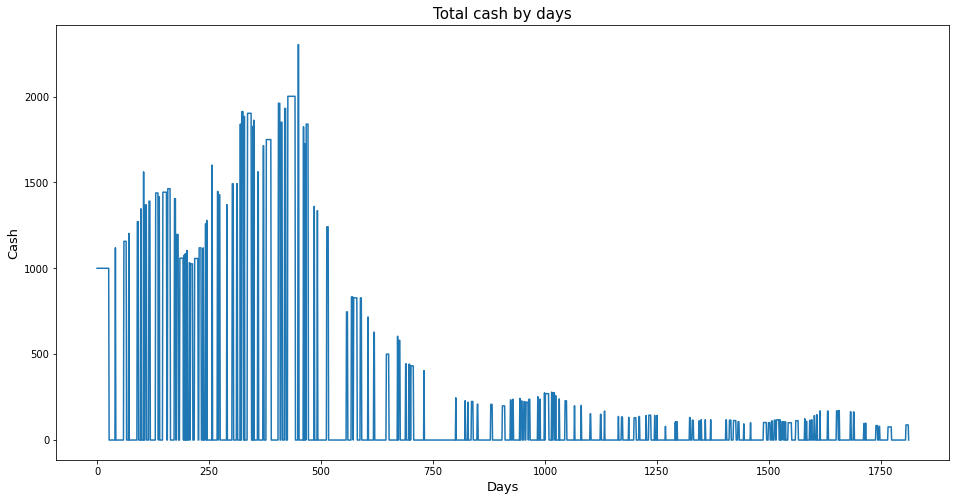

In [ ]:
from google.colab import files



plt.figure(figsize=(16,8))
plt.title("Total cash by days",fontsize=15)
plt.xlabel("Days",fontsize=13)
plt.ylabel("Cash",fontsize=13)
plt.plot(m)
plt.savefig("cash.png")
files.download("cash.png") 
plt.show()




In [ ]:
trans_bit_date

['11/12/16',
 '11/21/16',
 '11/27/16',
 '12/2/16',
 '12/3/16',
 '12/21/16',
 '12/24/16',
 '12/29/16',
 '12/30/16',
 '1/4/17',
 '1/7/17',
 '1/16/17',
 '2/25/17',
 '2/27/17',
 '3/5/17',
 '3/14/17',
 '3/18/17',
 '3/20/17',
 '3/25/17',
 '3/27/17',
 '4/8/17',
 '4/11/17',
 '4/15/17',
 '4/19/17',
 '5/6/17',
 '5/8/17',
 '5/13/17',
 '5/17/17',
 '5/21/17',
 '5/22/17',
 '5/28/17',
 '6/6/17',
 '6/24/17',
 '7/12/17',
 '7/15/17',
 '7/18/17',
 '7/30/17',
 '7/31/17',
 '8/19/17',
 '8/23/17',
 '9/2/17',
 '9/5/17',
 '9/30/17',
 '10/5/17',
 '10/28/17',
 '11/1/17',
 '11/5/17',
 '11/7/17',
 '11/11/17',
 '11/15/17',
 '11/18/17',
 '11/22/17',
 '12/9/17',
 '12/15/17',
 '12/17/17',
 '12/27/17',
 '12/29/17',
 '1/2/18',
 '1/7/18',
 '1/12/18',
 '1/13/18',
 '1/15/18',
 '1/21/18',
 '2/13/18',
 '2/25/18',
 '2/26/18',
 '3/10/18',
 '3/19/18',
 '3/24/18',
 '4/3/18',
 '4/28/18',
 '5/3/18',
 '5/6/18',
 '6/11/18',
 '6/16/18',
 '7/3/18',
 '7/21/18',
 '7/25/18',
 '8/4/18',
 '8/20/18',
 '9/8/18',
 '9/20/18',
 '9/23/18',
 '9/2

Epoch 1/100
44/44 [==============================] - 5s 41ms/step - loss: 0.0242
Epoch 2/100
44/44 [==============================] - 2s 41ms/step - loss: 0.0042
Epoch 3/100
44/44 [==============================] - 3s 57ms/step - loss: 0.0039
Epoch 4/100
44/44 [==============================] - 3s 78ms/step - loss: 0.0035
Epoch 5/100
44/44 [==============================] - 2s 45ms/step - loss: 0.0033
Epoch 6/100
44/44 [==============================] - 2s 54ms/step - loss: 0.0030
Epoch 7/100
44/44 [==============================] - 2s 42ms/step - loss: 0.0029
Epoch 8/100
44/44 [==============================] - 2s 41ms/step - loss: 0.0028
Epoch 9/100
44/44 [==============================] - 2s 41ms/step - loss: 0.0028
Epoch 10/100
44/44 [==============================] - 2s 40ms/step - loss: 0.0027
Epoch 11/100
44/44 [==============================] - 2s 40ms/step - loss: 0.0028
Epoch 12/100
44/44 [==============================] - 2s 41ms/step - loss: 0.0025
Epoch 13/100
44/44 [=====

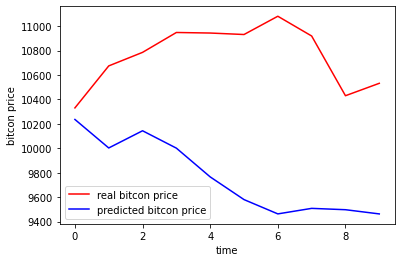

In [ ]:
# %% codecell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
'''redirection'''
import os
# path = r"/Users/barry/Desktop/Machine Learning A-Z Main Folder"\
#        r"/Part 13 - Contest"
# os.chdir(path)

# %% codecell
'''Part 1 data preprocessing ------------------------------------------------'''

dataset = pd.read_csv('BCHAIN-MKPRU.csv')

'''split into training and test set'''

def get_dataset(dataset, split_val):
    data_length = len(dataset)
    split_percent = split_val
    split = round(split_percent*data_length)
    training = dataset.iloc[0:split]
    test = dataset.iloc[split:]
    training_set = training.iloc[:,1:2].values
    test_set = test.iloc[:,1:2].values
    real_bitcon_test = test_set
    return training_set, real_bitcon_test

def get_dataset_2(dataset, split_day):
    training = dataset.iloc[0:split_day]
    test = dataset.iloc[split_day:]
    training_set = training.iloc[:,1:2].values
    test_set = test.iloc[:,1:2].values
    real_bitcon_test = test_set
    return training_set, real_bitcon_test

# training_set, real_bitcon_test = get_dataset(dataset,0.8)
training_set, real_bitcon_test = get_dataset_2(dataset,1460)

'''feature scaling, use normalisation'''

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

'''create a data structure with 20 timesteps and 5 output (train on 20 (timestep) data points to predict 5 output)'''

n_past = 60
n_future = 10

X_train_1 = []
y_train_1 = []
for i in range(n_past, len(training_set) - n_future + 1):
    X_train_1.append(training_set_scaled[i-n_past:i, 0])
    y_train_1.append(training_set_scaled[i:i+n_future, 0])

X_train, y_train = np.array(X_train_1), np.array(y_train_1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# %% codecell
'''Part 2 build the RNN -----------------------------------------------------'''

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

'''initialize the RNN'''
regressor = Sequential()
'''add the 1st LSTM layer and dropout regularization'''
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))
'''add the 2nd LSTM layer and dropout regularization'''
regressor.add(LSTM(units=50, return_sequences=False))
# regressor.add(Dropout(0.2))
"""
'''add the 3rd LSTM layer and dropout regularization'''
regressor.add(LSTM(units=40, return_sequences=True))
regressor.add(Dropout(0.2))
"""
'''add the 4th LSTM layer and dropout regularization'''
# regressor.add(LSTM(units=30))
# regressor.add(Dropout(0.2))
regressor.add(Dense(units=25))
'''add the output layer'''
regressor.add(Dense(units=n_future))
'''compile the RNN'''
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
'''fit the RNN to the training set'''
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# %% codecell
'''Part 3 make the predition and visualize the results ----------------------'''

dataset_total = dataset.iloc[:,1:2].values
inputs = dataset_total[len(training_set)-n_past:-n_future+1]
# inputs = dataset_total[len(training_set)-n_past:]

inputs = inputs.reshape(-1,1) # convert to a single column vertical array
inputs = sc.transform(inputs) # only apply fit.transform to the training set

X_test = []

for i in range(n_past, len(inputs)):
    X_test.append(inputs[i-n_past:i,0])
X_test = np.array(X_test)


def get_predict_actual(period):
    prid = period # the prediction period index
    X_test_p = X_test[prid]
    X_test_p = np.reshape(X_test_p,(1, len(X_test[prid]), 1))
    prediction_p = regressor.predict(X_test_p)
    prediction_p = sc.inverse_transform(prediction_p)
    prediction_p =prediction_p.reshape(-1,1)
    actual_p = real_bitcon_test[prid:prid+n_future]
    one_day_before_p = pd.to_datetime(dataset['Date'][len(training_set)+prid-1]).date()
    day_name = pd.to_datetime(dataset['Date'][len(training_set)+prid-1]).day_name()
    sentence = 'date_compare includes predicted results of '+str(n_future)+' '+'consecutive financial days post '+str(one_day_before_p)+' '+str(day_name)
    print(sentence)
    return prediction_p, actual_p

prediction, actual = get_predict_actual(4)

data_compare = pd.DataFrame(columns=['Predict','Actual'])
data_compare['Predict'] = pd.DataFrame(prediction, columns=['Predict'])['Predict']
data_compare['Actual'] = pd.DataFrame(actual, columns=['Actual'])['Actual']

print('data_compare:')
print(data_compare)





plt.plot(actual, color = 'red', label = 'real bitcon price')
plt.plot(prediction, color = 'blue', label = 'predicted bitcon price')
plt.xlabel('bitcon price prediction')
plt.xlabel('time')
plt.ylabel('bitcon price')
plt.legend()
plt.show()


In [ ]:


def run_rnn(dataset, split_day, period):
  training = dataset.iloc[0:split_day]
  test = dataset.iloc[split_day:]
  training_set = training.iloc[:,1:2].values
  test_set = test.iloc[:,1:2].values
  real_bitcon_test = test_set
  

  sc = MinMaxScaler(feature_range=(0, 1))
  training_set_scaled = sc.fit_transform(training_set)

  '''create a data structure with 20 timesteps and 5 output (train on 20 (timestep) data points to predict 5 output)'''

  n_past = 60
  n_future = 10

  X_train_1 = []
  y_train_1 = []
  for i in range(n_past, len(training_set) - n_future + 1):
    X_train_1.append(training_set_scaled[i-n_past:i, 0])
    y_train_1.append(training_set_scaled[i:i+n_future, 0])

  X_train, y_train = np.array(X_train_1), np.array(y_train_1)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))




  '''initialize the RNN'''
  regressor = Sequential()
  '''add the 1st LSTM layer and dropout regularization'''
  regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  # regressor.add(Dropout(0.2))
  '''add the 2nd LSTM layer and dropout regularization'''
  regressor.add(LSTM(units=50, return_sequences=False))
  # regressor.add(Dropout(0.2))
  """
  '''add the 3rd LSTM layer and dropout regularization'''
  regressor.add(LSTM(units=40, return_sequences=True))
  regressor.add(Dropout(0.2))
  """
  '''add the 4th LSTM layer and dropout regularization'''
  # regressor.add(LSTM(units=30))
  # regressor.add(Dropout(0.2))
  regressor.add(Dense(units=25))
  '''add the output layer'''
  regressor.add(Dense(units=n_future))
  '''compile the RNN'''
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  '''fit the RNN to the training set'''
  regressor.fit(X_train, y_train, epochs = 2, batch_size = 32)



  dataset_total = dataset.iloc[:,1:2].values
  inputs = dataset_total[len(training_set)-n_past:-n_future+1]
  # inputs = dataset_total[len(training_set)-n_past:]

  inputs = inputs.reshape(-1,1) # convert to a single column vertical array
  inputs = sc.transform(inputs) # only apply fit.transform to the training set

  X_test = []

  for i in range(n_past, len(inputs)):
    X_test.append(inputs[i-n_past:i,0])
  
  X_test = np.array(X_test)


  prid = period # the prediction period index
  X_test_p = X_test[prid]
  X_test_p = np.reshape(X_test_p,(1, len(X_test[prid]), 1))
  prediction_p = regressor.predict(X_test_p)
  prediction_p = sc.inverse_transform(prediction_p)
  prediction_p =prediction_p.reshape(-1,1)
  actual_p = real_bitcon_test[prid:prid+n_future]
  one_day_before_p = pd.to_datetime(dataset['Date'][len(training_set)+prid-1]).date()
  day_name = pd.to_datetime(dataset['Date'][len(training_set)+prid-1]).day_name()
  sentence = 'date_compare includes predicted results of '+str(n_future)+' '+'consecutive financial days post '+str(one_day_before_p)+' '+str(day_name)
  #print(sentence)
    

  prediction, actual = prediction_p, actual_p

  data_compare = pd.DataFrame(columns=['Predict','Actual'])
  data_compare['Predict'] = pd.DataFrame(prediction, columns=['Predict'])['Predict']
  data_compare['Actual'] = pd.DataFrame(actual, columns=['Actual'])['Actual']

  # print('data_compare:')


  # plt.plot(actual, color = 'red', label = 'real bitcon price')
  # plt.plot(prediction, color = 'blue', label = 'predicted bitcon price')
  # plt.xlabel('bitcon price prediction')
  # plt.xlabel('time')
  # plt.ylabel('bitcon price')
  # plt.legend()
  # plt.show()


  predict_list = data_compare['Predict'].tolist()
  actual_list = data_compare['Actual'].tolist()

  max_predict = max(predict_list)
  
  rate = (max_predict - predict_list[0])/predict_list[0]

  max_index = predict_list.index(max_predict)

  r = [rate,max_index]
  return r








Epoch 1/2
1/1 [==============================] - 4s 4s/step - loss: 0.6973
Epoch 2/2
1/1 [==============================] - 0s 46ms/step - loss: 0.6475
data_compare:


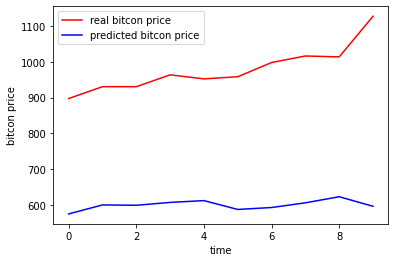

[0.08318668711018931, 8]

In [ ]:
run_rnn(dataset, 100, 6)

In [ ]:
d_b = pd.read_csv(io.BytesIO(uploaded1['BCHAIN-MKPRU.csv']))
d_g = pd.read_csv(io.BytesIO(uploaded2['LBMA-GOLD.csv']))

d_g = d_g.rename(columns={'USD (PM)': 'Value'})



d_g['Date'] = pd.to_datetime(d_g['Date'])

r1 = pd.date_range(start=min_date1, end=max_date1)
d_g = d_g.set_index('Date').reindex(r1).fillna(method='ffill').rename_axis('Date').reset_index()
#gold_df['Value1'] = gold_df['Value'].fillna(method='ffill')

d = d_g['Date'].tolist()

import time

from datetime import datetime
timearr = []

for i in d:
  timearr.append(i.strftime("%m/%d/%Y"))

d_temp = pd.DataFrame(timearr)

d_g['Date'] = d_temp

d_b = d_b.reindex(d_b.index.drop(0)).reset_index(drop=True)

d_g

,Date,Value
0,09/12/2016,1324.60
1,09/13/2016,1323.65
2,09/14/2016,1321.75
3,09/15/2016,1310.80
4,09/16/2016,1308.35
...,...,...
1820,09/06/2021,1821.60
1821,09/07/2021,1802.15
1822,09/08/2021,1786.00
1823,09/09/2021,1788.25


In [ ]:
t_size = 100
a = [1000,0,0]
p = 0.1 #涨幅大于



b_b = False
b_g = False

b_price = 0
g_price = 0

for i in range(t_size+1,len(bit_value_list)-1):
  cash = a[0]
  r_b = run_rnn(d_b,t_size,10)
  r_g = run_rnn(d_g,t_size,10)
  if (g_weekdays[i] != 0): #工作日
    

    if(b_b == True):
      if (bit_value_list[i] - b_price)/b_price >= r_b[0]:
        b_b = False
        b_price = 0
        a[0] += a[2]*bit_value_list[i]*0.98
        a[2] -= a[2]

        print(a)
    
    if(b_g == True):
      if (bit_value_list[i] - g_price)/g_price >= r_g[0]:
        b_g = False
        g_price = 0
        a[0] += a[1]*gold_value_list[i]*0.99
        a[1] -= a[1]

        print(a)



    if (r_b[0] > 0 and r_g[0] > 0): #bit,gold 都涨
      if (r_b[0] >= p):
        if (r_b[0] >= r_g[0] and b_b == False):

          a[0] -= cash
          a[2] += cash*(1/bit_value_list[i])

          b_price = bit_value_list[i]

          print(a)
        elif (r_b[0] < r_g[0] and b_g == False):

          a[0] -= cash
          a[1] += (cash*0.99)*(1/gold_value_list[i])

          g_price = gold_value_list[i]

          print(a)
    elif (r_b[0] > 0 and r_g[0] < 0):
      if (r_b[0] >= p):
        if b_b == False:

          a[0] -= cash
          a[2] += cash*(1/bit_value_list[i])

          b_price = bit_value_list[i]

          print(a)
    
    elif (r_b[0] < 0 and r_g[0] > 0):
      if (r_g[0] >= p):
        if b_g == False:

          a[0] -= cash
          a[1] += (cash*0.99)*(1/gold_value_list[i])

          g_price = gold_value_list[i]
          
          print(a)
  else: #周六周日
    continue

print (a)

Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.6375
Epoch 2/2
1/1 [==============================] - 0s 44ms/step - loss: 0.5915
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.0891
Epoch 2/2
1/1 [==============================] - 0s 45ms/step - loss: 0.0751
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.6113
Epoch 2/2
1/1 [==============================] - 0s 48ms/step - loss: 0.5650
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.0745
Epoch 2/2
1/1 [==============================] - 0s 43ms/step - loss: 0.0587
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.6280
Epoch 2/2
1/1 [==============================] - 0s 43ms/step - loss: 0.5781
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.0750
Epoch 2/2
1/1 [==============================] - 0s 47ms/step - loss: 0.0635
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.6506
Epoch 2/2
1/1

KeyboardInterrupt: ignored

In [ ]:
g_weekdays

[1324.6,
 1323.65,
 1321.75,
 1310.8,
 1308.35,
 0.0,
 0.0,
 1314.85,
 1313.8,
 1326.1,
 1339.1,
 1338.65,
 0.0,
 0.0,
 1340.5,
 1327.0,
 1322.5,
 1318.1,
 1322.5,
 0.0,
 0.0,
 1313.3,
 1283.3,
 1269.4,
 1254.5,
 1258.75,
 0.0,
 0.0,
 1259.5,
 1253.45,
 1256.5,
 1261.05,
 1251.75,
 0.0,
 0.0,
 1254.8,
 1258.2,
 1269.05,
 1271.65,
 1266.05,
 0.0,
 0.0,
 1265.55,
 1269.4,
 1270.5,
 1266.25,
 1273.0,
 0.0,
 0.0,
 1272.0,
 1288.45,
 1303.75,
 1301.0,
 1302.8,
 0.0,
 0.0,
 1283.05,
 1282.35,
 1281.4,
 1267.5,
 1236.45,
 0.0,
 0.0,
 1213.6,
 1226.95,
 1229.2,
 1226.75,
 1211.0,
 0.0,
 0.0,
 1214.25,
 1212.25,
 1185.35,
 1186.1,
 1187.7,
 0.0,
 0.0,
 1187.0,
 1186.55,
 1178.1,
 1161.85,
 1173.5,
 0.0,
 0.0,
 1162.2,
 1172.5,
 1177.65,
 1171.05,
 1163.6,
 0.0,
 0.0,
 1156.1,
 1158.55,
 1162.25,
 1126.95,
 1131.6,
 0.0,
 0.0,
 1136.25,
 1125.7,
 1133.65,
 1131.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1134.6,
 1145.9,
 0.0,
 0.0,
 0.0,
 0.0,
 1151.0,
 1164.25,
 1176.7,
 1175.85,
 0.0,
 0.0,
 1178.5,
 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import math


In [ ]:
data1 = bit_df.filter(['Value'])

data_bit = data1.values

training_data_len = round(len(data_bit)*0.5)

training_data_len

912

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_bit)
scaled_data

array([[2.47616119e-04],
       [2.67469881e-04],
       [2.34115561e-04],
       ...,
       [7.34034716e-01],
       [7.22427572e-01],
       [7.27038568e-01]])

In [ ]:
train_data_b = scaled_data[0:training_data_len,:]

x_train = []
y_train = []

for i in range(30,len(train_data_b)):
  x_train.append(train_data_b[i-30:i,0])
  y_train.append(train_data_b[i,0])
  if i <= 30:
    print(x_train)

 
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

x_train.shape



[array([2.47616119e-04, 2.67469881e-04, 2.34115561e-04, 2.58893056e-04,
       2.38721634e-04, 2.05843804e-04, 2.77952667e-04, 2.55875284e-04,
       2.31574279e-04, 7.62384459e-05, 5.30492519e-05, 0.00000000e+00,
       1.55653494e-04, 1.21663853e-04, 7.78267469e-05, 1.88690154e-04,
       1.84084081e-04, 1.55177003e-04, 2.43168876e-04, 3.29413618e-04,
       3.00188881e-04, 2.82241080e-04, 2.46821969e-04, 2.08067425e-04,
       2.85894172e-04, 3.67374011e-04, 3.28142978e-04, 3.42596516e-04,
       3.72615404e-04, 3.28619468e-04])]


(882, 30, 1)

In [ ]:
model = Sequential()

model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size)

882/882 [==============================] - 20s 18ms/step - loss: 3.7908e-04


In [ ]:
test_data = scaled_data[training_data_len-30:,:]

x_test =[]
y_test = data_bit[training_data_len:,:]

for i in range(30,len(test_data)):
  x_test.append(test_data[i-30:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3629.9894064040254

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


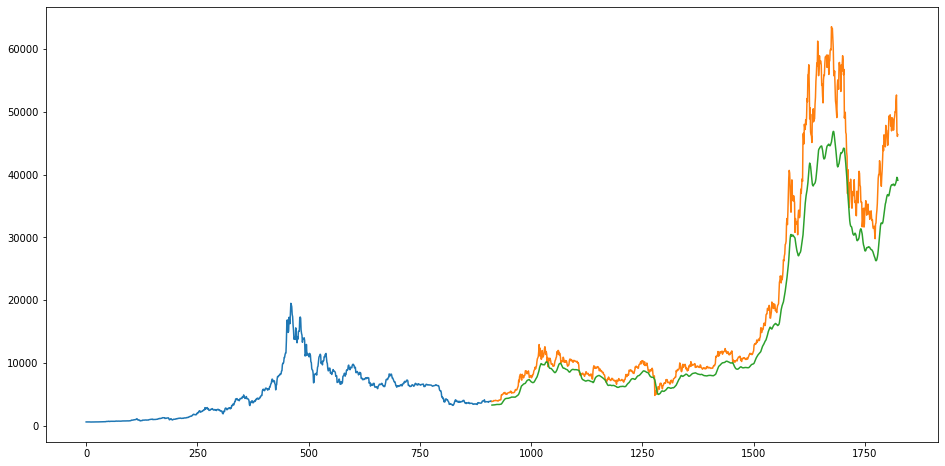

In [ ]:
train = data1[:training_data_len]
valid = data1[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.plot(train['Value'])
plt.plot(valid[['Value','predictions']])
plt.show()